In [1]:
#Importing Libraries and loading data sets
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date, time
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('supermarket.xlsx')

In [2]:
df.head(2)

,RowID,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Date,Time,Payment,cost_of_goods_sold,gross margin percentage,gross income,Rating,Year in City,Age,ProdID
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,...,2019-05-01 00:00:00,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,8,0-17,P001
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,...,2019-08-03 00:00:00,10:29:00,Cash,76.40,4.761905,3.8200,9.6,4,18-25,P002


In [3]:
df.info()
#no null value found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RowID                    1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cost_of_goods_sold       

In [4]:
#changing some feature to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   RowID                    1000 non-null   int64         
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

In [8]:
#dropping unnecesary columns
df1 = df.copy()

In [15]:
df1 = df1.drop('Time',axis = 1)

In [17]:
df1.head()

,RowID,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cost_of_goods_sold,gross margin percentage,gross income,Rating,Year in City,Age,ProdID
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,Ewallet,522.83,4.761905,26.1415,9.1,8,0-17,P001
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,Cash,76.40,4.761905,3.8200,9.6,4,18-25,P002
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,6,0-17,P003
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,3,45-50,P001
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,Ewallet,604.17,4.761905,30.2085,5.3,1,55+,P004


### Checking Categories

In [19]:
df1['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [20]:
df1['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [35]:
df1[['City','Branch']].value_counts()
#we see a relation between city and Branch, where each brach designation are for each city they belong to.

City       Branch
Yangon     A         340
Mandalay   B         332
Naypyitaw  C         328
dtype: int64

In [21]:
df1['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [39]:
df1['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [23]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [40]:
df1['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [46]:
df1[['Customer type','Gender']].value_counts()

Customer type  Gender
Member         Female    261
Normal         Male      259
Member         Male      240
Normal         Female    240
dtype: int64

In [24]:
df1['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [25]:
df1['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [41]:
df1['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [26]:
df1['Age'].unique()

array(['0-17', '18-25', '45-50', '55+', '26-35', '36-45', '51-55'],
      dtype=object)

In [42]:
df1['Age'].value_counts()

45-50    156
55+      148
36-45    147
18-25    146
51-55    141
0-17     133
26-35    129
Name: Age, dtype: int64

In [28]:
df1['ProdID'].unique()

array(['P001', 'P002', 'P003', 'P004', 'P005', 'P006'], dtype=object)

In [31]:
df1[['Product line', 'ProdID']].value_counts()
#we see that each product line has a designated product ID

Product line            ProdID
Fashion accessories     P006      178
Food and beverages      P005      174
Electronic accessories  P002      170
Sports and travel       P004      166
Home and lifestyle      P003      160
Health and beauty       P001      152
dtype: int64

In [36]:
df1.drop_duplicates()
#there are no duplicate rows in this data set

,RowID,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cost_of_goods_sold,gross margin percentage,gross income,Rating,Year in City,Age,ProdID
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,Ewallet,522.83,4.761905,26.1415,9.1,8,0-17,P001
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,Cash,76.40,4.761905,3.8200,9.6,4,18-25,P002
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,6,0-17,P003
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,3,45-50,P001
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,Ewallet,604.17,4.761905,30.2085,5.3,1,55+,P004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,Ewallet,40.35,4.761905,2.0175,6.2,5,36-45,P001
996,996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-02-03,Ewallet,973.80,4.761905,48.6900,4.4,5,26-35,P003
997,997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-09-02,Cash,31.84,4.761905,1.5920,7.7,4,18-25,P005
998,998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,Cash,65.82,4.761905,3.2910,4.1,5,18-25,P003


### Visualization of Dataset

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

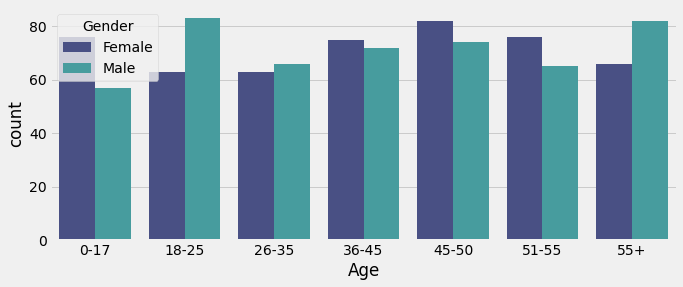

In [44]:
#Looking at a bar plot of gender by age group
plt.figure(figsize=(10,4))
plot = sns.countplot(data=df1, x= 'Age',hue='Gender',order=['0-17','18-25','26-35','36-45','45-50','51-55','55+'], palette = 'mako')

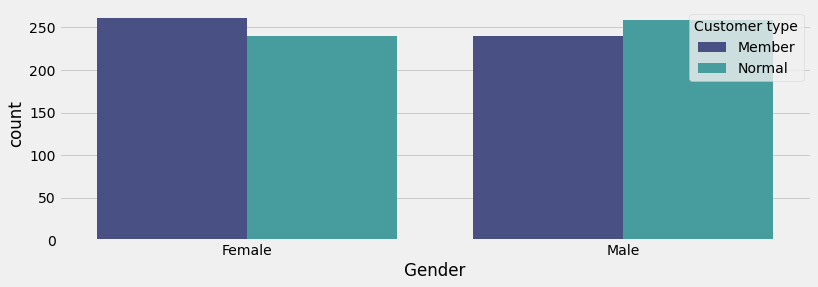

In [53]:
plt.figure(figsize = (12,4))
plot = sns.countplot(data = df1, x = 'Gender', hue = 'Customer type', palette = 'mako')

In [77]:
df1['Age'] = pd.Categorical(df1['Age'],['0-17','18-25','26-35','36-45','45-50','51-55','55+'])

In [79]:
df1['Age'].unique()

['0-17', '18-25', '45-50', '55+', '26-35', '36-45', '51-55']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '45-50', '51-55', '55+']

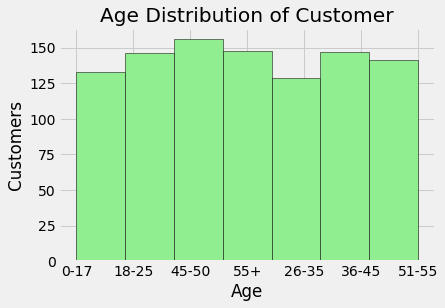

In [81]:
plt.style.use('fivethirtyeight')
plt.hist(df1.Age,bins = 7,color = 'lightgreen',edgecolor = 'black')
plt.title('Age Distribution of Customer')
plt.xlabel('Age')
plt.ylabel('Customers')
plt.show()

In [82]:
df1.to_csv("supermarket_df.csv",index=False)
df1

,RowID,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cost_of_goods_sold,gross margin percentage,gross income,Rating,Year in City,Age,ProdID
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,Ewallet,522.83,4.761905,26.1415,9.1,8,0-17,P001
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,Cash,76.40,4.761905,3.8200,9.6,4,18-25,P002
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,6,0-17,P003
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,3,45-50,P001
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,Ewallet,604.17,4.761905,30.2085,5.3,1,55+,P004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,Ewallet,40.35,4.761905,2.0175,6.2,5,36-45,P001
996,996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-02-03,Ewallet,973.80,4.761905,48.6900,4.4,5,26-35,P003
997,997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-09-02,Cash,31.84,4.761905,1.5920,7.7,4,18-25,P005
998,998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,Cash,65.82,4.761905,3.2910,4.1,5,18-25,P003
